In [36]:
# !pip install seaborn

In [37]:
# !pip install scikit-learn

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [39]:
df1 = pd.read_csv('datasets/criterion_classics.csv', encoding='utf8', index_col=0)
df1.head()

,movieTitle,director,person,IMDBRating,year,seen
personRank,,,,,,
1,All About Eve,Joseph L. Mankiewicz,Kasi Lemmons,8.2,1950,NaN
2,All That Jazz,Bob Fosse,Kasi Lemmons,7.9,1979,NaN
3,Black Orpheus,Marcel Camus,Kasi Lemmons,7.5,1959,NaN
4,Don't Look Now,Nicolas Roeg,Kasi Lemmons,7.3,1973,NaN
5,Do the Right Thing,Spike Lee,Kasi Lemmons,7.9,1989,NaN


In [40]:
df1.shape

(2377, 6)

In [42]:
df1.drop(['seen'], inplace=True, axis=1)

In [43]:
df1.sample(10)

,movieTitle,director,person,IMDBRating,year
personRank,,,,,
9,Mystery Train,Jim Jarmusch,Christophe Honoré,7.6,1989
10,The Royal Tenenbaums,Wes Anderson,Dennis Lehane,7.6,2001
9,Bob Dylan: Don't Look Back,D. A. Pennebaker,Julia Cafritz,8,1967
5,Sisters,Brian De Palma,Bill Hader,6.9,1972
9,Vengeance Is Mine,Shohei Imamura,William Friedkin,7.8,1979
6,The Princess Bride,Rob Reiner,Steven Yeun,8.1,1987
3,Mona Lisa,Neil Jordan,Bill Hader,7.3,1986
8,Mulholland Dr.,David Lynch,Steven Yeun,7.9,2001
5,Lola Montès,Max Ophuls,Bong Joon-ho,7.3,1955


In [44]:
df1.movieTitle.value_counts()

Brazil                         23
The Third Man                  22
8½                             22
A Woman Under the Influence    21
The Night of the Hunter        18
                               ..
One Hour with You               1
The Darjeeling Limited          1
Judex                           1
Equinox Flower                  1
Three Colors: White             1
Name: movieTitle, Length: 649, dtype: int64

In [46]:
df1['IMDBRating'] = pd.to_numeric(df1['IMDBRating'], errors='coerce')
df1['year'] = pd.to_datetime(df1.year, errors='coerce').dt.year
df1.sort_index(inplace=True)
df1.head()

,movieTitle,director,person,IMDBRating,year
personRank,,,,,
1,All About Eve,Joseph L. Mankiewicz,Kasi Lemmons,8.2,1950.0
1,The 400 Blows,François Truffaut,Bong Joon-ho,8.1,1959.0
1,Fanny and Alexander: Theatrical Version,Ingmar Bergman,Ari Aster,8.1,1982.0
1,Cries and Whispers,Ingmar Bergman,Ari Aster,8.1,1972.0
1,Persona,Ingmar Bergman,Ari Aster,8.1,1966.0


In [47]:
# criterion.loc[~criterion.movieTitle.str.contains('SOME_STRING')]
@interact
def show_movie_data_collection(column='IMDBRating', x=widgets.FloatSlider(min=5.0, max=10.0, value=6.0)):
    return df1.loc[df1[column] == x]

interactive(children=(Text(value='IMDBRating', description='column'), FloatSlider(value=6.0, description='x', …

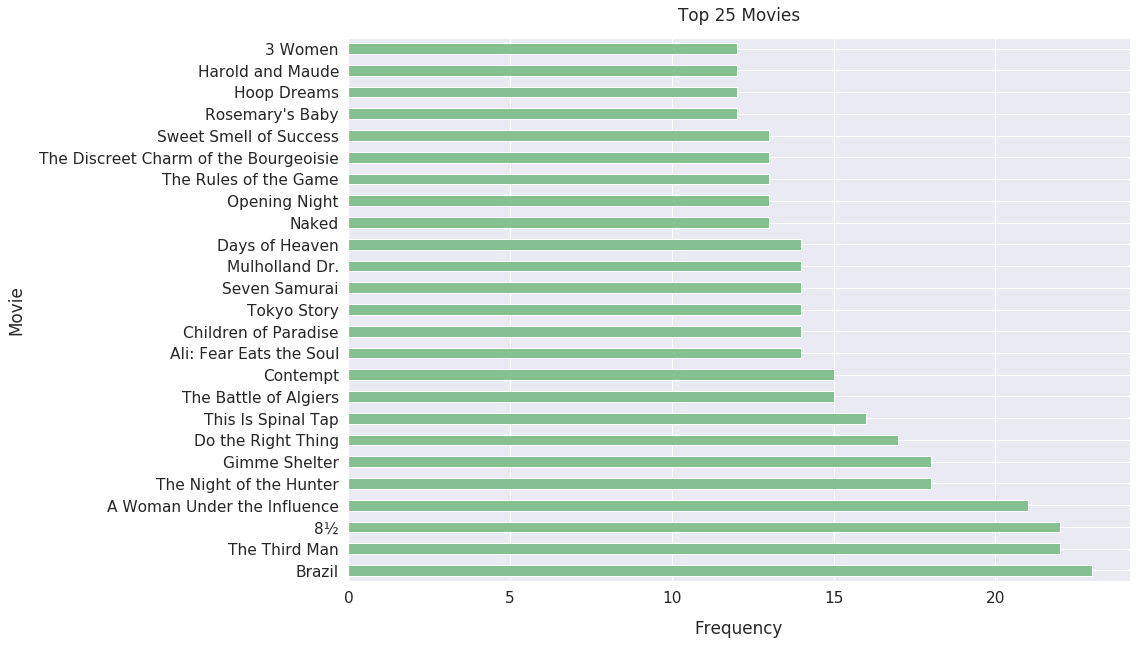

In [48]:
sns.set(font_scale=1.4)
df1['movieTitle'].value_counts()[:25].plot(kind='barh', figsize=(14, 10), color='#86bf91', rot=0)

plt.xlabel('Frequency', labelpad=14)
plt.ylabel('Movie', labelpad=14)
plt.title('Top 25 Movies', y=1.02)
plt.show()

<Figure size 432x288 with 0 Axes>

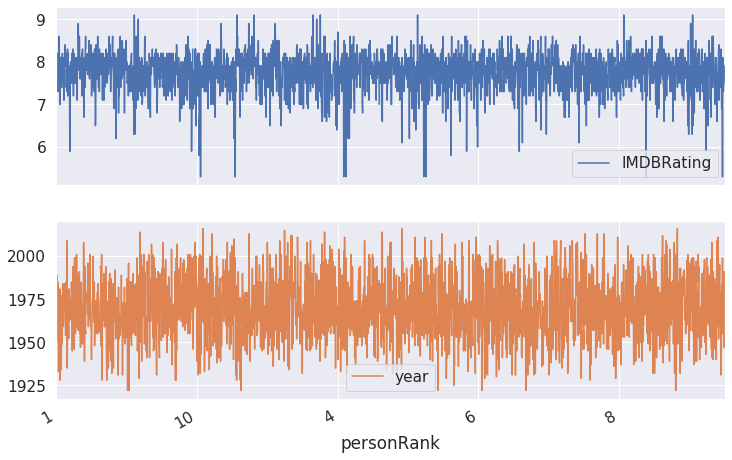

In [49]:
# df1['movieTitle'].hist(by=df1['Year'], figsize=(8, 12));
plt.figure()
df1.plot(subplots=True, figsize=(12, 8));

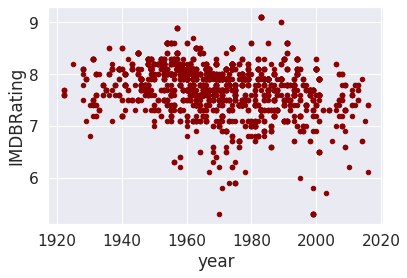

In [50]:
df1.plot.scatter(x='year',
                 y='IMDBRating',
                 c='DarkRed');

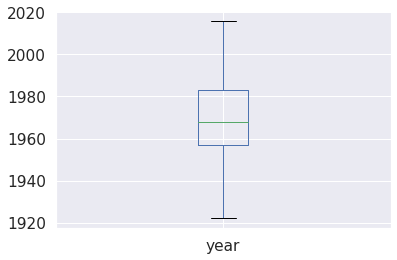

In [51]:
df1[['year']].boxplot();

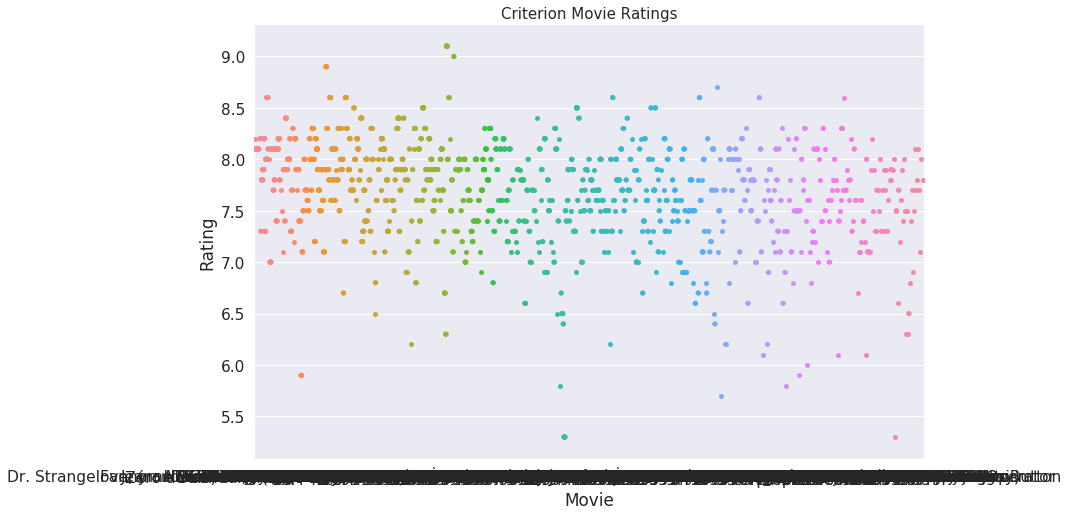

In [52]:
plt.figure(figsize=(12, 8))

sns.swarmplot(x='movieTitle', y='IMDBRating', data=df1)

plt.title('Criterion Movie Ratings', fontsize=15)

plt.xlabel('Movie', labelpad=4)
plt.ylabel('Rating', labelpad=4)
plt.show()